# Name: Hritik Shelar
# Roll no: 19101B0006
# IT-B
# AI&DS Expt 3: Seaborn

## Seaborn Library

Seaborn is a visualization library that sits on top of matplotlib, making it nicer to look at and adding some extra capabilities too.

First we will import some fuel consumption data from kaggle

In [1]:
import pandas as pd
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 
data = pd.read_csv('auto-mpg.data', names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
data = pd.DataFrame(data)
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


Replace Origin column with help of pandas: 1 as USA, 2 as Europe, 3 as Japan

In [2]:
data["Origin"].replace({1:"USA",2:"Europe",3:"Japan"}, inplace=True)

In [3]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


Let's start by plotting a histogram just using matplotlib to see the distribution by number of cylinders.

<AxesSubplot:>

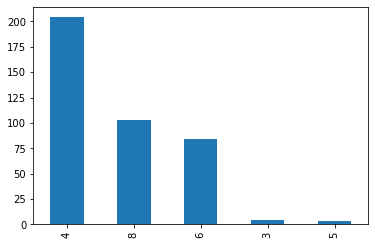

In [4]:
%matplotlib inline

cylinder_counts = data['Cylinders'].value_counts()
cylinder_counts.plot(kind='bar')

We can load up Seaborn, and just call set() on it to change matplotlib's default settings to something more visually pleasing

In [5]:
import seaborn as sns
sns.set()

Now if we plot the same graph we will get a more modern looking graph with grids

<AxesSubplot:>

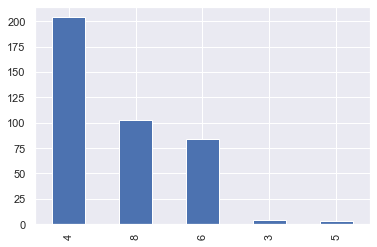

In [6]:
cylinder_counts.plot(kind='bar')

Seaborn includes many types of plots that matplotlib doens't offer. For example, "distplot" can be used to plot a histogram together with a smooth distribution of that histogram overlaid on it. Let's plot the distribution of MPG values on the vehicles in this database as an example:

C:\Users\Hritik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MPG', ylabel='Density'>

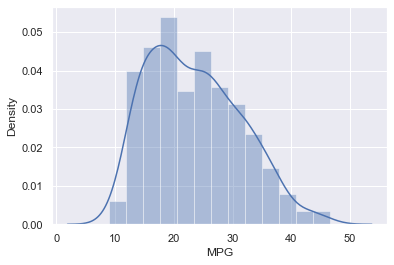

In [7]:
sns.distplot(data['MPG'])

sns.distplot is deprecated so we can replace it with histplot as per latest seaborn

<AxesSubplot:xlabel='MPG', ylabel='Density'>

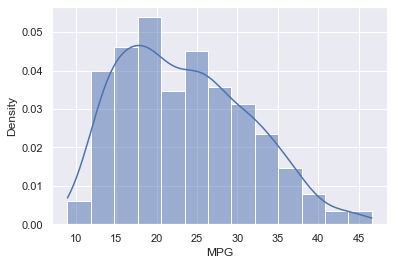

In [8]:
sns.histplot(data['MPG'],kde=True, stat="density")

We get the same plot

There is a plot in Seaborn known as 'pair-plot'. This lets you visualize plots of every combination of various attributes together, so you can look for interesting patterns between features.

For example, let us have a comparison between MPG, cylinders and horsepower

In [9]:
df = data[['MPG', 'Cylinders', 'Horsepower']]
df.head()

,MPG,Cylinders,Horsepower
0,18.0,8,130.0
1,15.0,8,165.0
2,18.0,8,150.0
3,16.0,8,150.0
4,17.0,8,140.0


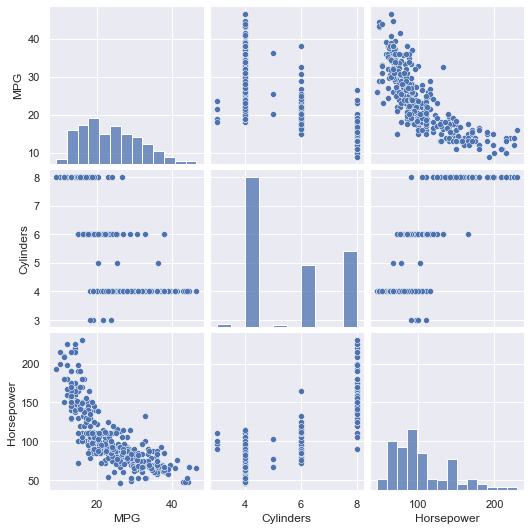

In [10]:
sns.pairplot(df)

By studying above data, we can see that as Horsepower increases, MPG reduces. In this way, we can analyze various pairs of columns and find out relationship with them.

Seaborn also includes "scatterplot", which is exactly what it sounds like. It plots individual data points across two axes of your choosing, so you can see how your data is distributed across those dimensions.

<AxesSubplot:xlabel='MPG', ylabel='Displacement'>

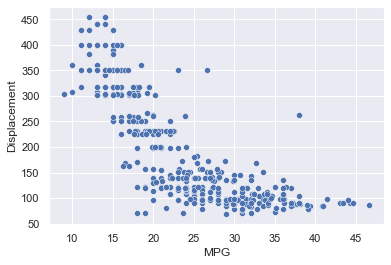

In [11]:
sns.scatterplot(x='MPG', y='Displacement', data=data)

Seaborn also offers a "jointplot", which combines a scatterplot with histograms on both axes. This lets you visualize both the individual data points and the distribution across both dimensions at the same time.

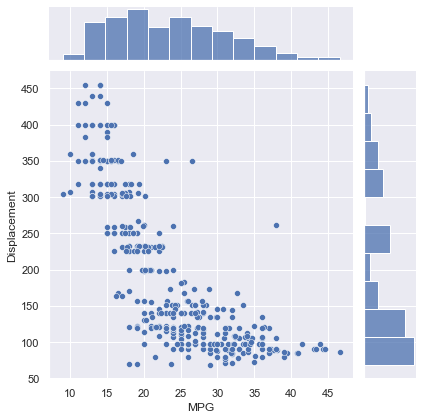

In [12]:
sns.jointplot(x='MPG', y='Displacement', data=data)

The "lmplot" is a scatterplot, but with a linear regression line computed and overlaid onto the data.

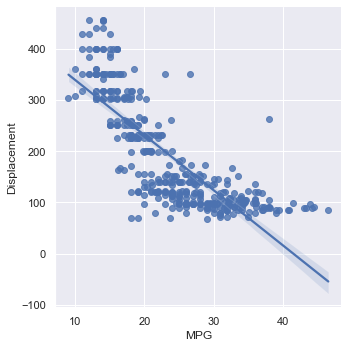

In [13]:
sns.lmplot(x='MPG', y='Displacement', data=data)

Now there's 'box-plot'.This is what's called a "box and whiskers" plot, which is useful for visualizing typical values for a given category without getting distracted by outliers. Each box represents the range between the first and third quartiles of the data, with a line representing the median value. The "whiskers" that extend from the box represent the spread of the remainder of the data, apart from clear outliers that are plotted as individual points outside of the whiskers.

As an example, let's look at box plots cylinders, visualizing the MPG ratings across the vehicles. This lets us look at the spread of MPG ratings across all number of gears.

<AxesSubplot:xlabel='Cylinders', ylabel='MPG'>

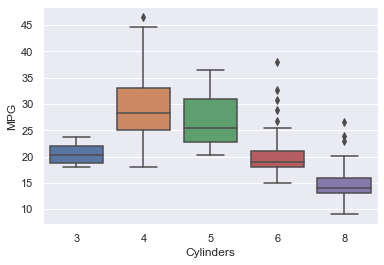

In [14]:
sns.boxplot(x='Cylinders', y='MPG', data=data)

Another way to visualize the same data is the "swarm plot." Instead of boxes and whiskers, it plots each individual data point - but does so in such way that groups them together based on their distribution. It makes more sense when you look at it:

<AxesSubplot:xlabel='Cylinders', ylabel='MPG'>

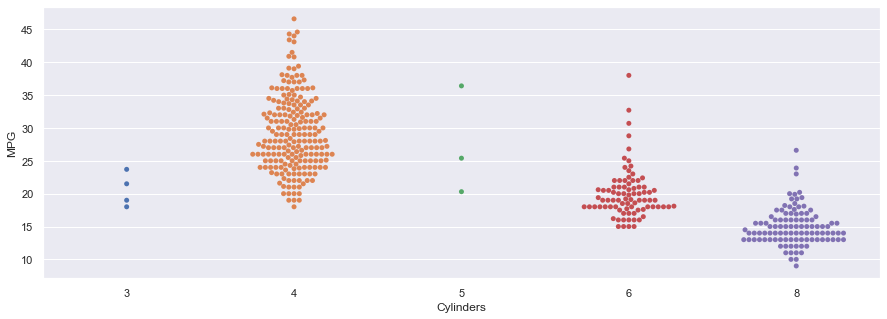

In [15]:
#We need to increase figure size as all points can't fit in small plot
sns.set(rc={'figure.figsize':(15,5)})
sns.swarmplot(x='Cylinders', y='MPG', data=data)

Another tool is the "count plot." This is basically the same thing as a histogram, but for categorical data. It lets you count up how many times each given category on the X axis occurs in your data, and plot it.

<AxesSubplot:xlabel='Cylinders', ylabel='count'>

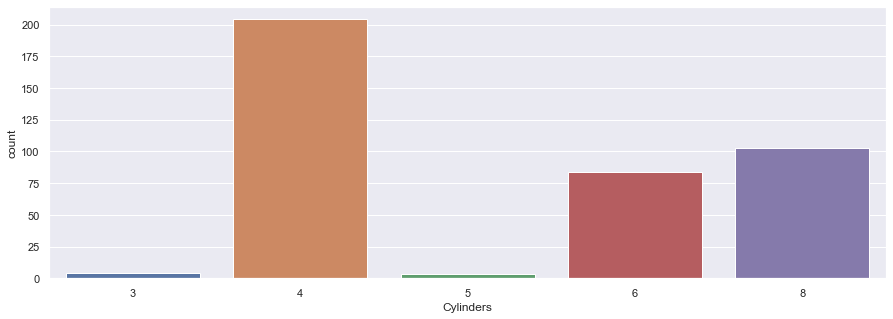

In [16]:
sns.countplot(x='Cylinders', data=data)

Finally, lets look at a heat-map in Seaborn. A heat map allows you to plot tabular, 2D data of some sort, with colors representing the individual values in each cell of the 2D table.

In this example, we'll create a pivot table from our original dataframe, to create a 2D table that contains the average MPG ratings for every combination of number of cylinders and engine displacement.

The resulting heatmap shows all of the engine displacement values along the X axis, and all of the cylinder values along the Y axis. For each cell of the table, the actual average MPG rating for that combination of cylinders and engine displacement is represented not as a number, but as a color that ranges from dark for small values, and light for larger values.

<AxesSubplot:xlabel='Displacement', ylabel='Cylinders'>

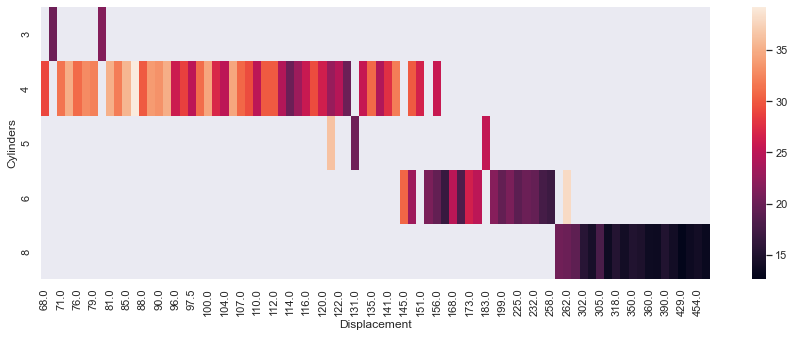

In [17]:
df2 = data.pivot_table(index='Cylinders', columns='Displacement', values='MPG', aggfunc='mean')
sns.heatmap(df2)